In [0]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
#Read the data
df = pd.read_csv("SMS-Messages2.csv", encoding='utf-8')
df.head(n=10)

,Message,Class_Label
0,'Go until jurong point,ham
1,'Ok lar... Joking wif u oni...',ham
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam
3,'U dun say so early hor... U c already then sa...,ham
4,'Nah I don\'t think he goes to usf,ham
5,'FreeMsg Hey there darling it\'s been 3 week\'...,spam
6,'Even my brother is not like to speak with me....,ham
7,'As per your request \'Melle Melle (Oru Minnam...,ham
8,'WINNER!! As a valued network customer you hav...,spam
9,'Had your mobile 11 months or more? U R entitl...,spam


In [0]:
my_text = df.sample(100)
my_text.to_csv("E:\\mytext.csv")

In [8]:
#Explore the data
df.head()

,Message,Class_Label
0,'Go until jurong point,ham
1,'Ok lar... Joking wif u oni...',ham
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam
3,'U dun say so early hor... U c already then sa...,ham
4,'Nah I don\'t think he goes to usf,ham


In [9]:
df.columns

Index(['Message', 'Class_Label'], dtype='object')

In [10]:
df.shape

(200, 2)

In [12]:
#Create the tokens in a seperate column in the dataframe
df['words'] = df['Message'].str.strip().str.split('[\W_]+')
df.head()

,Message,Class_Label,words
0,'Go until jurong point,ham,"[, Go, until, jurong, point]"
1,'Ok lar... Joking wif u oni...',ham,"[, Ok, lar, Joking, wif, u, oni, ]"
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam,"[, Free, entry, in, 2, a, wkly, comp, to, win,..."
3,'U dun say so early hor... U c already then sa...,ham,"[, U, dun, say, so, early, hor, U, c, already,..."
4,'Nah I don\'t think he goes to usf,ham,"[, Nah, I, don, t, think, he, goes, to, usf]"


In [0]:
#Get the words to be scored by lexicon
corpus = df['words'].values

In [14]:
corpus[0:5]

array([list(['', 'Go', 'until', 'jurong', 'point']),
       list(['', 'Ok', 'lar', 'Joking', 'wif', 'u', 'oni', '']),
       list(['', 'Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', 'Text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'T', 'C', 's', 'apply', '08452810075over18', 's', '']),
       list(['', 'U', 'dun', 'say', 'so', 'early', 'hor', 'U', 'c', 'already', 'then', 'say', '']),
       list(['', 'Nah', 'I', 'don', 't', 'think', 'he', 'goes', 'to', 'usf'])],
      dtype=object)

(-0.5, 1199.5, 999.5, -0.5)

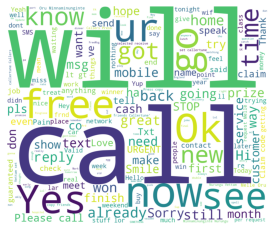

In [16]:
#Visualize the world cloud
#Concatenate all the words in data to form a string
str_data = " "
data_dump = df['Message']
for record in data_dump:
    str_data = str_data + " " + record

wordcloud = WordCloud(    stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(str_data)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
#Read the lexicon file
lex_file = open("AFINN-111.csv",encoding='cp1252')

In [18]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
print(lexicons)
lexicons['JBS'] = -10
print(lexicons["JBS"])

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [33]:
#For each Message
#For each word in Message
#Get the word score (score is a numbe rif the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
strength = []
prediction = []
for message in corpus:
    score = 0
    for word in message:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)
    if (score >= 0):
        prediction.append('ham')
    else:
        prediction.append('spam')
print(strength[0:10])
print(prediction[0:10])

[0, 0, 4, 0, 0, 5, 4, 0, -13, 1]
['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham']


In [0]:
df['strength'] = strength
df['prediction']= prediction

In [21]:
df.head()

,Message,Class_Label,words,strength,prediction
0,'Go until jurong point,ham,"[, Go, until, jurong, point]",0,ham
1,'Ok lar... Joking wif u oni...',ham,"[, Ok, lar, Joking, wif, u, oni, ]",0,ham
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam,"[, Free, entry, in, 2, a, wkly, comp, to, win,...",4,ham
3,'U dun say so early hor... U c already then sa...,ham,"[, U, dun, say, so, early, hor, U, c, already,...",0,ham
4,'Nah I don\'t think he goes to usf,ham,"[, Nah, I, don, t, think, he, goes, to, usf]",0,ham


In [22]:
#Explore the results
df.groupby('prediction')['prediction'].count()

prediction
ham     176
spam     24
Name: prediction, dtype: int64

In [23]:
#Explore the results
df.groupby('Class_Label')['Class_Label'].count()

Class_Label
ham     167
spam     33
Name: Class_Label, dtype: int64

In [24]:
pd.crosstab(df['Class_Label'], df['prediction'])

prediction,ham,spam
Class_Label,,
ham,145,22
spam,31,2


In [0]:
#Create the spam only data set
df_spam = df[df['Class_Label']=='spam']

In [26]:
#Inspect/explore spam data set
df_spam.head()

,Message,Class_Label,words,strength,prediction
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam,"[, Free, entry, in, 2, a, wkly, comp, to, win,...",4,ham
5,'FreeMsg Hey there darling it\'s been 3 week\'...,spam,"[, FreeMsg, Hey, there, darling, it, s, been, ...",5,ham
8,'WINNER!! As a valued network customer you hav...,spam,"[, WINNER, As, a, valued, network, customer, y...",2,ham
9,'Had your mobile 11 months or more? U R entitl...,spam,"[, Had, your, mobile, 11, months, or, more, U,...",1,ham
11,'SIX chances to win CASH! From 100 to 20,spam,"[, SIX, chances, to, win, CASH, From, 100, to,...",6,ham


(-0.5, 1199.5, 999.5, -0.5)

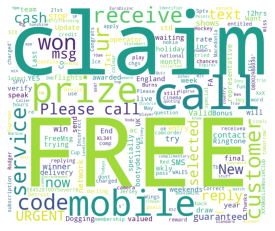

In [28]:
#Visualize the world cloud only for spa
#Concatenate all the words in data to form a string
str_data = " "
data_dump = df_spam['Message']
for record in data_dump:
    str_data = str_data + " " + record

wordcloud = WordCloud(    stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(str_data)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [29]:
lexicons['free'] = -5
lexicons['prize'] = -5
lexicons['claim'] = -5
lexicons['call'] = -5
print(lexicons["claim"])

-5


In [34]:
#Scoring with revised lexicons
#For each Message
#For each word in Message
#Get the word score (score is a numbe rif the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
strength = []
prediction = []
for message in corpus:
    score = 0
    for word in message:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)
    if (score >= 0):
        prediction.append('ham')
    else:
        prediction.append('spam')
print(strength[0:10])
print(prediction[0:10])

[0, 0, 4, 0, 0, 5, 4, 0, -13, 1]
['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham']


In [0]:
df['strength2'] = strength
df['prediction2']= prediction

In [32]:
pd.crosstab(df['Class_Label'], df['prediction2'])

prediction2,ham,spam
Class_Label,,
ham,138,29
spam,18,15


In [35]:
!jupyter nbconvert MODULE4_DAY3_LexicalSpamAnalysis.ipynb

[NbConvertApp] Converting notebook MODULE4_DAY3_LexicalSpamAnalysis.ipynb to html
[NbConvertApp] Writing 611062 bytes to MODULE4_DAY3_LexicalSpamAnalysis.html
